# Exploratory data analysis (EDA)

## Data cleaning

In [76]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 

df = pd.read_excel("data/sysselsattning_MYH.xlsx", skiprows = 3, index_col = 0, skipfooter=6).drop("Övrigt")
df.head()

,2014\n(avser examinerade 2013),2015\n(avser examinerade 2014),2016\n(avser examinerade 2015),2017\n(avser examinerade 2016),2018\n(avser examinerade 2017),2019\n(avser examinerade 2018),2020\n(avser examinerade 2019),2021\n(avser examinerade 2020)
Utbildningsområde,,,,,,,,
Data/It,77 ± 3,78 ± 2,84 ± 2,91 ± 2,90 ± 2,90 ± 2,84 ± 2,84 ± 2
"Ekonomi, administration och försäljning",90 ± 1,91 ± 1,93 ± 1,94 ± 1,94 ± 1,96 ± 1,91 ± 1,90 ± 1
Friskvård och kroppsvård,88 ± 5,85 ± 6,90 ± 5,92 ± 6,95 ± 5,..,83 ± 10,87 ± 9
"Hotell, restaurang och turism",86 ± 2,88 ± 2,88 ± 2,89 ± 3,86 ± 3,91 ± 3,74 ± 3,76 ± 4
Hälso- och sjukvård samt socialt arbete,92 ± 1,95 ± 1,96 ± 1,95 ± 1,95 ± 1,93 ± 1,93 ± 1,94 ± 1


In [77]:
df.columns = [year for year in range(2013, 2021)]
df.head()

,2013,2014,2015,2016,2017,2018,2019,2020
Utbildningsområde,,,,,,,,
Data/It,77 ± 3,78 ± 2,84 ± 2,91 ± 2,90 ± 2,90 ± 2,84 ± 2,84 ± 2
"Ekonomi, administration och försäljning",90 ± 1,91 ± 1,93 ± 1,94 ± 1,94 ± 1,96 ± 1,91 ± 1,90 ± 1
Friskvård och kroppsvård,88 ± 5,85 ± 6,90 ± 5,92 ± 6,95 ± 5,..,83 ± 10,87 ± 9
"Hotell, restaurang och turism",86 ± 2,88 ± 2,88 ± 2,89 ± 3,86 ± 3,91 ± 3,74 ± 3,76 ± 4
Hälso- och sjukvård samt socialt arbete,92 ± 1,95 ± 1,96 ± 1,95 ± 1,95 ± 1,93 ± 1,93 ± 1,94 ± 1


---
## Divide df into mean and uncertainty

### Theory on confidence interval
Original format: mean percentage ± uncertainty, which is a way to represent the 95% confidence interval of the data. Note that confidence interval is a statistical term based on a true parameter of a distribution that is unknown and the data that we see is a sample drawn from this distribution. Given that we draw infinite amount of samples from this distribution we get that 95% of the times the sample is captured within the given confidence interval. Also as it's not stated in the data we can assume that the confidence interval is calculated using standard normal distribution. 

We need to divide the dataframe into two dataframes where one only has thet means and the other has the uncertainties. 

In [78]:
df = df.replace("..", np.nan) # in order to do interpolation on missing values

df_uncertainty = df.apply(lambda element: element.str[-2:])
df_uncertainty = df_uncertainty.astype(float).interpolate(axis=1)
df_uncertainty.head()

,2013,2014,2015,2016,2017,2018,2019,2020
Utbildningsområde,,,,,,,,
Data/It,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
"Ekonomi, administration och försäljning",1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Friskvård och kroppsvård,5.0,6.0,5.0,6.0,5.0,7.5,10.0,9.0
"Hotell, restaurang och turism",2.0,2.0,2.0,3.0,3.0,3.0,3.0,4.0
Hälso- och sjukvård samt socialt arbete,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [79]:
df_mean = df.apply(lambda element: element.str[:2]).astype(float).interpolate(axis=1)
df_mean.head()

,2013,2014,2015,2016,2017,2018,2019,2020
Utbildningsområde,,,,,,,,
Data/It,77.0,78.0,84.0,91.0,90.0,90.0,84.0,84.0
"Ekonomi, administration och försäljning",90.0,91.0,93.0,94.0,94.0,96.0,91.0,90.0
Friskvård och kroppsvård,88.0,85.0,90.0,92.0,95.0,89.0,83.0,87.0
"Hotell, restaurang och turism",86.0,88.0,88.0,89.0,86.0,91.0,74.0,76.0
Hälso- och sjukvård samt socialt arbete,92.0,95.0,96.0,95.0,95.0,93.0,93.0,94.0


## Visualizations

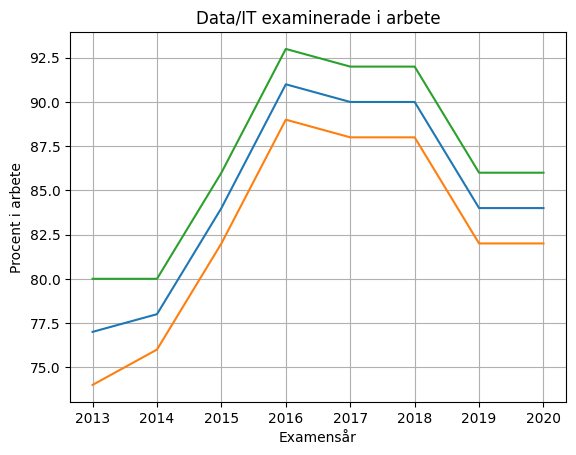

In [89]:
# testing one plot 
fig, ax = plt.figure(), plt.axes()
df_mean.loc["Data/It"].plot(ax = ax)
(df_mean.loc["Data/It"] - df_uncertainty.loc["Data/It"]).plot(ax = ax) # lower confidence interval
(df_mean.loc["Data/It"] + df_uncertainty.loc["Data/It"]).plot(ax = ax) # upper confidence interval
ax.set(xlabel = "Examensår", ylabel = "Procent i arbete", title = "Data/IT examinerade i arbete")
ax.grid()

# TODO: refactor this code 
# TODO: fix filling between upper and lower confidence intervals

In [74]:
df.loc["Data/It"]

examen_2013    77 ± 3
examen_2014    78 ± 2
examen_2015    84 ± 2
examen_2016    91 ± 2
examen_2017    90 ± 2
examen_2018    90 ± 2
examen_2019    84 ± 2
examen_2020    84 ± 2
Name: Data/It, dtype: object